# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
%matplotlib inline 

In [12]:
df = pd.read_csv('data/human_body_temperature.csv')

In [9]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [13]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

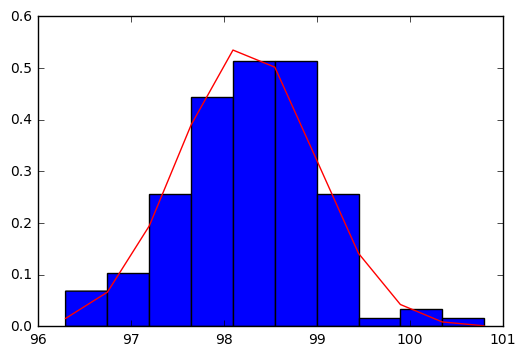

In [18]:
n, bins, patches = plt.hist(df.temperature, 10, normed=1)
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')

Considering null hypothesis that x is normally distributed and calculating the p-value from the below normaltest method.

In [20]:
import scipy.stats as stats
x=df.temperature
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

As the pvalue is 0.25 or 25%, we cannot reject the null hypothesis. Thus, the body temperatue is normally distributed.


3) Is the true population mean really 98.6 degrees F?
        Would you use a one-sample or two-sample test? Why?
        In this situation, is it appropriate to use the  tt  or  zz  statistic?
        Now try using the other test. How is the result be different? Why?

Finding out the standard error(SE)

In [21]:
s =  0.733183 #standard deviation we got from describe()
n=130 #count
SE = 0.733183/(130**0.5) #SE = s/n^0.5
SE

0.06430440297695857

We can use the Z test, because we know the mean.

mean(u) =  98.249231
population Mean(x) = 98.6

Now calculating the Z value.

z = x-u/SE

In [29]:
u= 98.6
x=98.249231
Z=round(float((x-u)/SE),3)
Z

-5.455

In [34]:
max_CI=round(x-(Z*SE),3)
min_CI=round(x+(Z*SE),3)
print (min_CI,max_CI)

97.898 98.6


At what temperature should we consider someone's temperature to be "abnormal"?
Ans: When  - temperature(t) values lies in the below range.

t > 98.6 and t < 97.898


Is there a significant difference between males and females in normal temperature?

In [38]:
M = df[df.gender == 'M']
F = df[df.gender == 'F']

In [39]:
df.gender.value_counts()

M    65
F    65
Name: gender, dtype: int64

In [40]:
M.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [41]:
F.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [53]:
s_M = 0.698756
s_F = 0.743488
n = 65
x_M=98.104615
x_F=98.393846
SE = ((((s_M**2)+(s_F**2))/n))**0.5
print("SE =",SE)
#SE
x_diff=x_M-x_F
print('x_diff =',x_diff)
Z= ((x_diff - 0)/SE)
print('Z =',Z)
CI_min= round(x_diff+(Z*SE),2)
CI_max= round(x_diff-(Z*SE),2)
print(CI_min,CI_max)


SE = 0.1265539929577035
x_diff = -0.2892310000000009
Z = -2.285435593459835
-0.58 0.0
